In [7]:
! cp -r /nfs/birdstore-brainbucket1/Active_Atlas_Data/UCSD_AxioScanner/2019/DK17_DK18/*.tif \
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/DK17_18/czi_raw_converted/

In [5]:
! ls /nfs/birdstore-brainbucket1/Active_Atlas_Data/UCSD_AxioScanner/2019/DK17_DK18/

DK17_18_slide001_2019_03_10.czi
DK17_18_slide001_2019_03_10-S1-Alexa Fluor 568.tif
DK17_18_slide001_2019_03_10-S1-CFP.tif
DK17_18_slide001_2019_03_10-S2-Alexa Fluor 568.tif
DK17_18_slide001_2019_03_10-S2-CFP.tif
DK17_18_slide001_2019_03_10-S3-Alexa Fluor 568.tif
DK17_18_slide001_2019_03_10-S3-CFP.tif
DK17_18_slide002_2019_03_10.czi
DK17_18_slide002_2019_03_10-S1-Alexa Fluor 568.tif
DK17_18_slide002_2019_03_10-S1-CFP.tif
DK17_18_slide002_2019_03_10-S2-Alexa Fluor 568.tif
DK17_18_slide002_2019_03_10-S2-CFP.tif
DK17_18_slide002_2019_03_10-S3-Alexa Fluor 568.tif
DK17_18_slide002_2019_03_10-S3-CFP.tif
DK17_18_slide002_2019_03_10-S4-Alexa Fluor 568.tif
DK17_18_slide002_2019_03_10-S4-CFP.tif
DK17_18_slide003_2019_03_10.czi
DK17_18_slide003_2019_03_10-S1-Alexa Fluor 568.tif
DK17_18_slide003_2019_03_10-S1-CFP.tif
DK17_18_slide003_2019_03_10-S2-Alexa Fluor 568.tif
DK17_18_slide003_2019_03_10-S2-CFP.tif
DK17_18_slide003_2019_03_10-S3-Alexa Fluor 568.tif
DK17_18_slide003_2019_03_10-S3-CFP.tif
DK17

In [1]:
import sys
import os
sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))

from vis3d_utilities import *

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.


Setting environment for Precision WorkStation for Alex Newberry
{'MD603': 0.46, 'MD635': 0.46}
SECTION LIMITS !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/media/alexn/BstemAtlasDataBackup/pipeline_test/CSHL_data_processed/MD603/MD603_cropbox.ini
VALID SECTIONS !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/media/alexn/BstemAtlasDataBackup/pipeline_test/CSHL_data_processed/MD603/MD603_cropbox.ini


Failed to cache MD603 section_limits: cannot import name load_mesh_stl
Seems you are using operation INIs to provide cropbox.
Failed to cache MD603 valid_sections/filenames: MD603
Seems you are using operation INIs to provide cropbox.


In [2]:
import vtk
from vtk.util import numpy_support

In [3]:
from skimage.measure import marching_cubes, correct_mesh_orientation, mesh_surface_area

In [18]:
import mxnet

ImportError: No module named mxnet

In [14]:
! which vtk

/usr/bin/vtk


In [22]:
set(real_paths)-set(jup_paths)

{'/snap/bin'}

In [9]:
passw = 'One2Three4'

In [1]:
! python a_test.py

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'MD589': 0.46, 'MD585': 0.46, 'UCSD001': 0.325, 'MD594': 0.46, 'DK17': 0.325}
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini
Seems you are using operation INIs to provide cropbox.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini
Seems you are using operation INIs to provide cropbox.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_cropbox.ini
Seems you are using operation INIs to provide cropbox.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_cropbox.ini
Seems you are using operation INIs to provide cropbox.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Failed to cache MD590 anchor: ini file /media/alexn/BstemAtlasDataBackup/ucsd_

In [17]:
! echo $passw | sudo -S -E python a_test.py

[sudo] password for alexn: Sorry, try again.
[sudo] password for alexn: 
sudo: 1 incorrect password attempt


In [1]:
# Clean Folder

! ls *.ini

input_spec.ini	rotate270.ini


(932, 1739)
(323, 349)


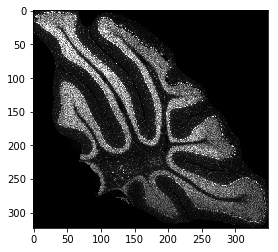

In [16]:
stack='UCSD001'

import os
import subprocess
import numpy as np
import scipy as sp

import sys
import json
import time
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from metadata import *
from preprocess_utilities import *
from data_manager import DataManager
from a_driver_utilities import *

sorted_fns = get_fn_list_from_sorted_filenames( stack )
img_fps = []
for fn in sorted_fns:
    img_fp = DataManager.get_image_filepath_v2(stack=stack, resol='thumbnail', \
                        prep_id=None, version='NtbNormalized', fn=fn)
    img_fps.append(img_fp)

img_fp = img_fps[2]
cerebellum_fp = '/home/alexn/Desktop/custom/cerebellum.tif'

img =  imread(img_fp)
cerebellum = imread(cerebellum_fp)[::,::,0]
cerebellum_mask = imread(cerebellum_fp)[::,::,1]
print np.shape(img)
print np.shape(cerebellum)

plt.imshow(cerebellum, cmap='gray')


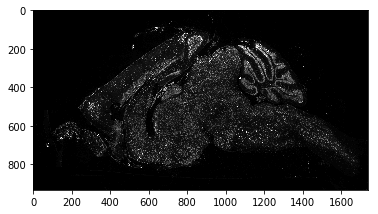

In [35]:
plt.imshow(img, cmap='gray')

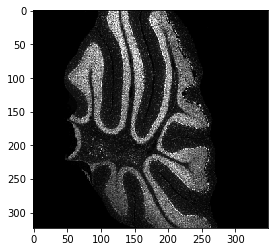

In [34]:
# ROTATION
cerebellum_rot = sp.ndimage.rotate(cerebellum, -30, reshape=False)

plt.imshow(cerebellum_rot, cmap='gray')

In [37]:
translation_lim = 400 # x + y can both shift by this many pixels
rotation_lim = 30 # -30 to +30 degrees rotated

translation_init = [200,1100]
rotation_init = 0

y_len,x_len = np.shape(cerebellum_mask)

for y in y_len:
    for x in x_len:
        # If this pixel is a part of the cerebellum mask
        if cerebellum_mask[y,x] == 255:
            do_stuff

In [38]:
y_len

323